### Demand generation (week 5)
Decide whether demand is given or randomly generated

In [10]:
# Option 1 : given demand
demand = [217, 305, 42, 231, 263, 75]
numPeriods = len(demand) 

In [11]:
# Option 2 : randomly generated
import random
random.seed('0123456')
maxDemand = 500
numPeriods = 6

demand = [int(maxDemand*random.random()) for t in range(numPeriods)]
print(demand)

[102, 74, 375, 427, 240, 371]


### Inventory Policy
Decide on the inventory policy

In [12]:
policy = "s,Q" #reorder point - order quantity policy

In [13]:
policy = "R,S" # base stock policy

In [14]:
policy = "s,S" # reorder point - order up to policy

### Parameters

In [15]:
inventory = 250  # initial inventory at simulation start
L = 2

# parameters for policies (R,S), (s,Q), or (s,S)
R = 2  # periodic ordering
S = 750  # order-up-to level
s = 320  # reorder point
Q = 550  # lot size

### Calculation

In [16]:
import pandas as pd
import copy

policies = {
    "s,Q": None, 
    "R,S": None, 
    "s,S": None
}

for policy in policies.keys():

    II = []  # initial inventory
    IP0 = [] # inventory position before order
    OQ = []  # order quantity
    IP1 = [] # inventory position after order
    IP2 = [] # inventory position after demand
    IA = []  # inventory after delivery
    FI = []  # final inventory
    AI = []  # average inventory
    FD = []  # fulfilled demand
    SO = []  # stockout (binary)

    for t in range(numPeriods):
        II.append(inventory if t == 0 else FI[t-1])

        ip = II[t]
        for l in range(1, L+1):
            ip += 0 if t-l < 0 else OQ[t-l]
        IP0.append(ip)

        oq_dict = {
            "s,Q": Q if ip <= s else 0,
            "R,S": max(S - ip, 0) if (t % R == 0) else 0,
            "s,S": max(S - ip, 0) if ip <= s else 0
        }
        OQ.append(oq_dict.get(policy))
        IP1.append(ip+oq_dict.get(policy))
        IP2.append(ip+oq_dict.get(policy)-demand[t])

        IA.append(II[t] + (0 if t-L < 0 else OQ[t-L]))
        FI.append(IA[t] - demand[t])
        AI.append(0.5*(IA[t]+FI[t]) if FI[t] >= 0 else (IA[t]*IA[t]/(2*demand[t]) if IA[t] >= 0 else 0))
        FD.append(max(min(IA[t], demand[t]), 0))
        SO.append(1 if FI[t] < 0 else 0)

    print("Policy: " + policy)
    result = pd.DataFrame(
        [[II[i], IP0[i], OQ[i], IP1[i], IA[i], demand[i], IP2[i], FI[i], round(AI[i],2), FD[i], SO[i]] for i in range(numPeriods)], 
        columns=["Initial Inventory", "Inventory Position before Order", "Order Quantity", "Inventory Position after Order", "Inventory after Delivery", "Demand", "Inventory Position after Demand", "Final Inventory", "Average Inventory", "Fulfilled Demand", "Stockout"])
    display(result)
    
    alpha = 1 - sum(SO)/numPeriods
    beta = sum(FD)/sum(demand)
    print("alpha = " + str(round(alpha, 4)))
    print("beta = " + str(round(beta, 4)))
    print("")
    print("")
    
    policies[policy] = copy.deepcopy(result)

Policy: s,Q


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,250,250,550,800,250,102,698,148,199.00,102,0
1,148,698,0,698,148,74,624,74,111.00,74,0
2,74,624,0,624,624,375,249,249,436.50,375,0
3,249,249,550,799,249,427,372,-178,72.60,249,1
4,-178,372,0,372,-178,240,132,-418,0.00,0,1
5,-418,132,550,682,132,371,311,-239,23.48,132,1


alpha = 0.5
beta = 0.5865


Policy: R,S


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,250,250,500,750,250,102,648,148,199.00,102,0
1,148,648,0,648,148,74,574,74,111.00,74,0
2,74,574,176,750,574,375,375,199,386.50,375,0
3,199,375,0,375,199,427,-52,-228,46.37,199,1
4,-228,-52,802,750,-52,240,510,-292,0.00,0,1
5,-292,510,0,510,-292,371,139,-663,0.00,0,1


alpha = 0.5
beta = 0.472


Policy: s,S


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,250,250,500,750,250,102,648,148,199.00,102,0
1,148,648,0,648,148,74,574,74,111.00,74,0
2,74,574,0,574,574,375,199,199,386.50,375,0
3,199,199,551,750,199,427,323,-228,46.37,199,1
4,-228,323,0,323,-228,240,83,-468,0.00,0,1
5,-468,83,667,750,83,371,379,-288,9.28,83,1


alpha = 0.5
beta = 0.5242




s,Q


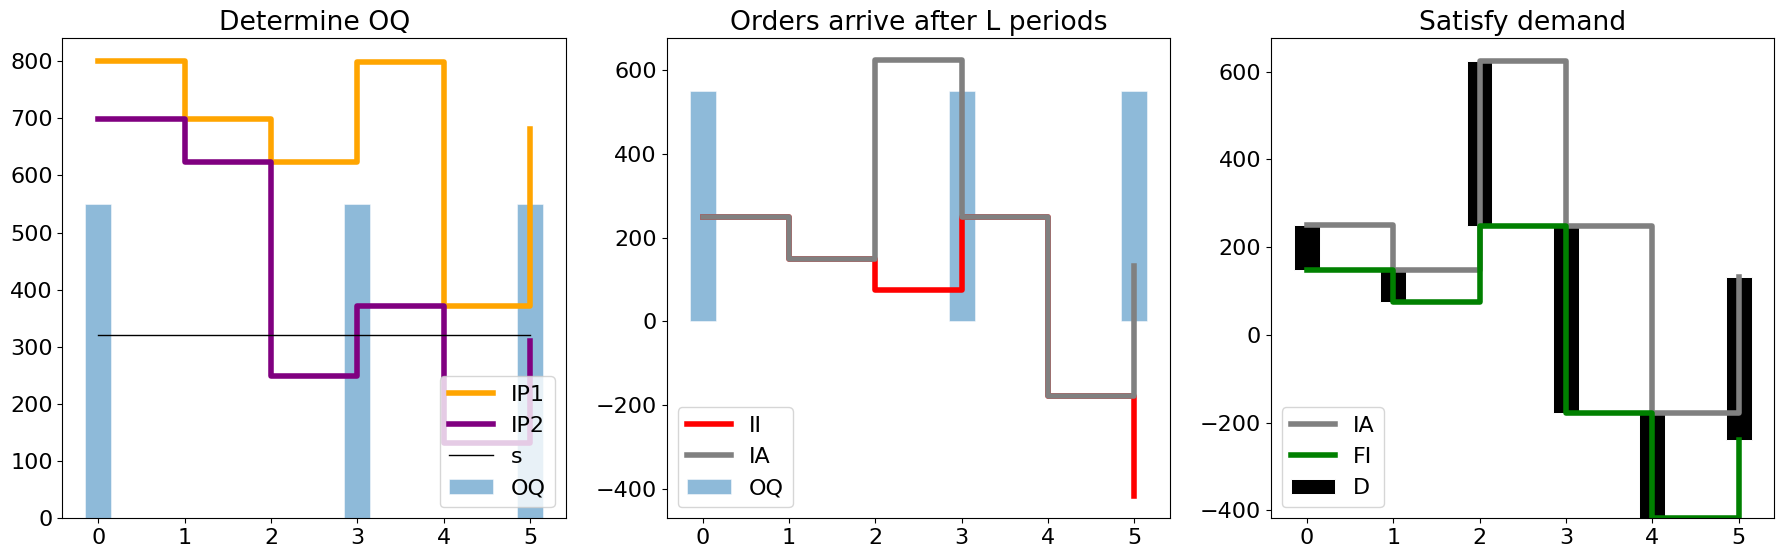

R,S


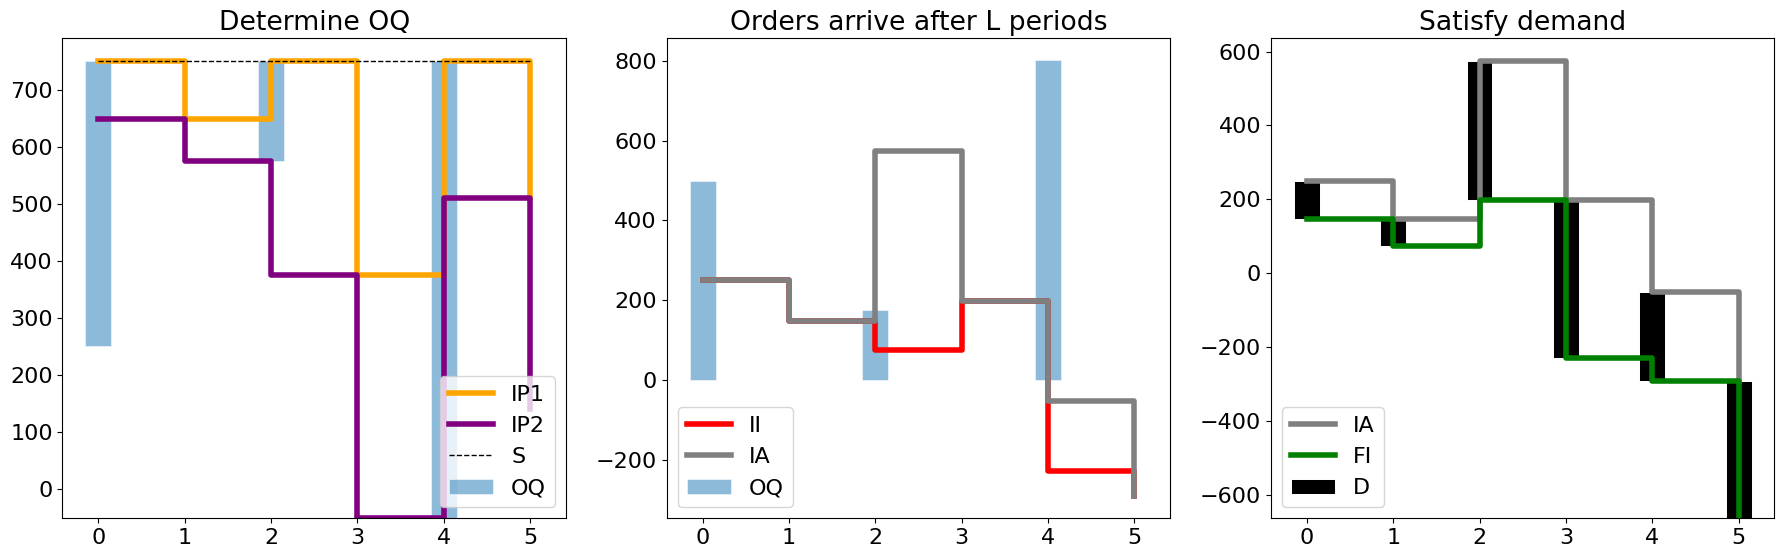

s,S


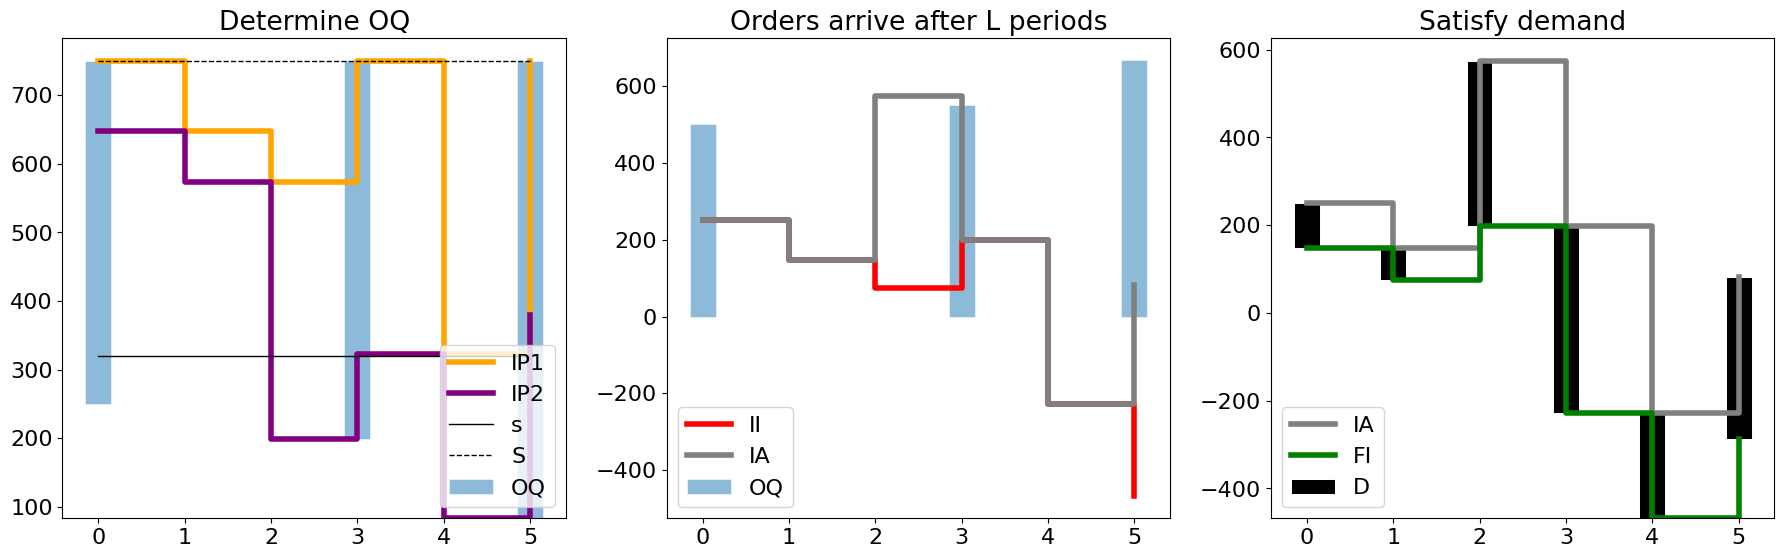

In [17]:
from matplotlib import pyplot as plt, cm

plt.rc('font', size=16)
plt.rc('lines', linewidth=4)
barwidth = 0.3
for policy in policies.keys():
    print(policy)
    
    res = policies[policy]   
    OQ = res.get('Order Quantity')
    IP0 = res.get('Inventory Position before Order')
    IP1 = res.get('Inventory Position after Order')
    IP2 = res.get('Inventory Position after Demand')
    II = res.get('Initial Inventory')
    IA = res.get('Inventory after Delivery')
    FI = res.get('Final Inventory')
    
    fig, axs = plt.subplots(nrows=1, ncols=3)
    
    ax_OQ = axs[0]
    ax_IA = axs[1]
    ax_D = axs[2]

    ax_OQ.step(range(numPeriods), IP1, where='post', label='IP1', color='orange')
    ax_OQ.step(range(numPeriods), IP2, where='post', label='IP2', color='purple')
    if policy == "s,Q":
        ax_OQ.plot(range(numPeriods), [s for t in range(numPeriods)], label='s', color='black', linewidth=1)
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=0, alpha=0.5)
    elif policy == "s,S":
        ax_OQ.plot(range(numPeriods), [s for t in range(numPeriods)], label='s', color='black', linewidth=1)
        ax_OQ.plot(range(numPeriods), [S for t in range(numPeriods)], label='S', color='black', linewidth=1, linestyle='dashed')
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=IP0, alpha=0.5)
    elif policy == "R,S":
        ax_OQ.plot(range(numPeriods), [S for t in range(numPeriods)], label='S', color='black', linewidth=1, linestyle='dashed')
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=IP0, alpha=0.5)
    ax_OQ.legend(loc=4)
    ax_OQ.set_title('Determine OQ')

    ax_IA.step(range(numPeriods), II, where='post', label='II', color='red')
    ax_IA.step(range(numPeriods), IA, where='post', label='IA', color='grey')
    ax_IA.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=0, alpha=0.5)
    ax_IA.set_title('Orders arrive after L periods')
    ax_IA.legend(loc=3)

    ax_D.step(range(numPeriods), IA, where='post', label='IA', color='grey')
    ax_D.step(range(numPeriods), FI, where='post', label='FI', color='green')
    ax_D.bar(range(numPeriods), demand, width=barwidth, label='D', edgecolor="white", linewidth=0.7, bottom=FI, color='black')
    ax_D.set_title('Satisfy demand')
    ax_D.legend(loc=3)

    plt.subplots_adjust(bottom=2, right=2.8, top=3)
    plt.show()

In [18]:
alpha = 1 - sum(SO)/numPeriods
beta = sum(FD)/sum(demand)
print("alpha = " + str(round(alpha, 4)))
print("beta = " + str(round(beta, 4)))

alpha = 0.5
beta = 0.5242
